## Import packages

In [1]:
import numpy as np
import simulators.jla_supernovae.jla_simulator as jla
import pydelfi.ndes as ndes
import pydelfi.delfi_edit as delfi
import pydelfi.score as score
import pydelfi.priors as priors
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline

In [2]:
import pylab as plt
import pyccl as ccl
import scipy
from scipy.interpolate import interp1d

import matplotlib
%matplotlib inline

import time
import importlib

print("CCL version you are using:",ccl.__version__)

CCL version you are using: 2.1.0


In [3]:
font_config = {"size" : 10,
               "family" : "serif"}

matplotlib.rc("font", **font_config)
matplotlib.rc("text", usetex=True)
# Move title to make space for exponents of y axis
matplotlib.rc("axes", titlepad=5) 
matplotlib.rc("axes", titlesize="medium") 

# Make the figures bigger in the notebook
matplotlib.rc("figure", dpi=150)

color_map = plt.get_cmap("tab10")

paper_textwidth = 7.125
fig_size = (paper_textwidth/2, 2.6)

plot_adjust = dict(left=0.2, top=0.9, bottom=0.2)

## Plot the learned posterior
Feed it a list of `(n_samples, n_parameters)` arrays for making a triangle plot; in this case let's just plot the posterior samples.

(Here I am just uploading posteriors from previous pydelfi runs)

In [4]:
import getdist
from getdist import plots, MCSamples
import matplotlib as mpl
from matplotlib.patches import Ellipse
from scipy.stats import norm

### Load MCMC chains

In [18]:
flat_samples = np.load('flat_samples_1000_more_z_bins.npy')
flat_samples = [flat_samples]

In [19]:
mcmc_samples = [MCSamples(samples=s, 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(flat_samples)]

Removed no burn in


## Running pydelfi for a long time

In [13]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_more_z_bins_4k_sims/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_more_z_bins_4k_sims/posterior_weights.npy')


In [8]:
samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


In [14]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_more_z_bins_15k_sims/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_more_z_bins_15k_sims/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_15k = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]



Removed no burn in


In [15]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_more_z_bins_fisher_pretraining/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_fiducial_more_z_bins_fisher_pretraining/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_f = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]



Removed no burn in


## As a check, compare DELFI posterior to a posterior from MCMC chain

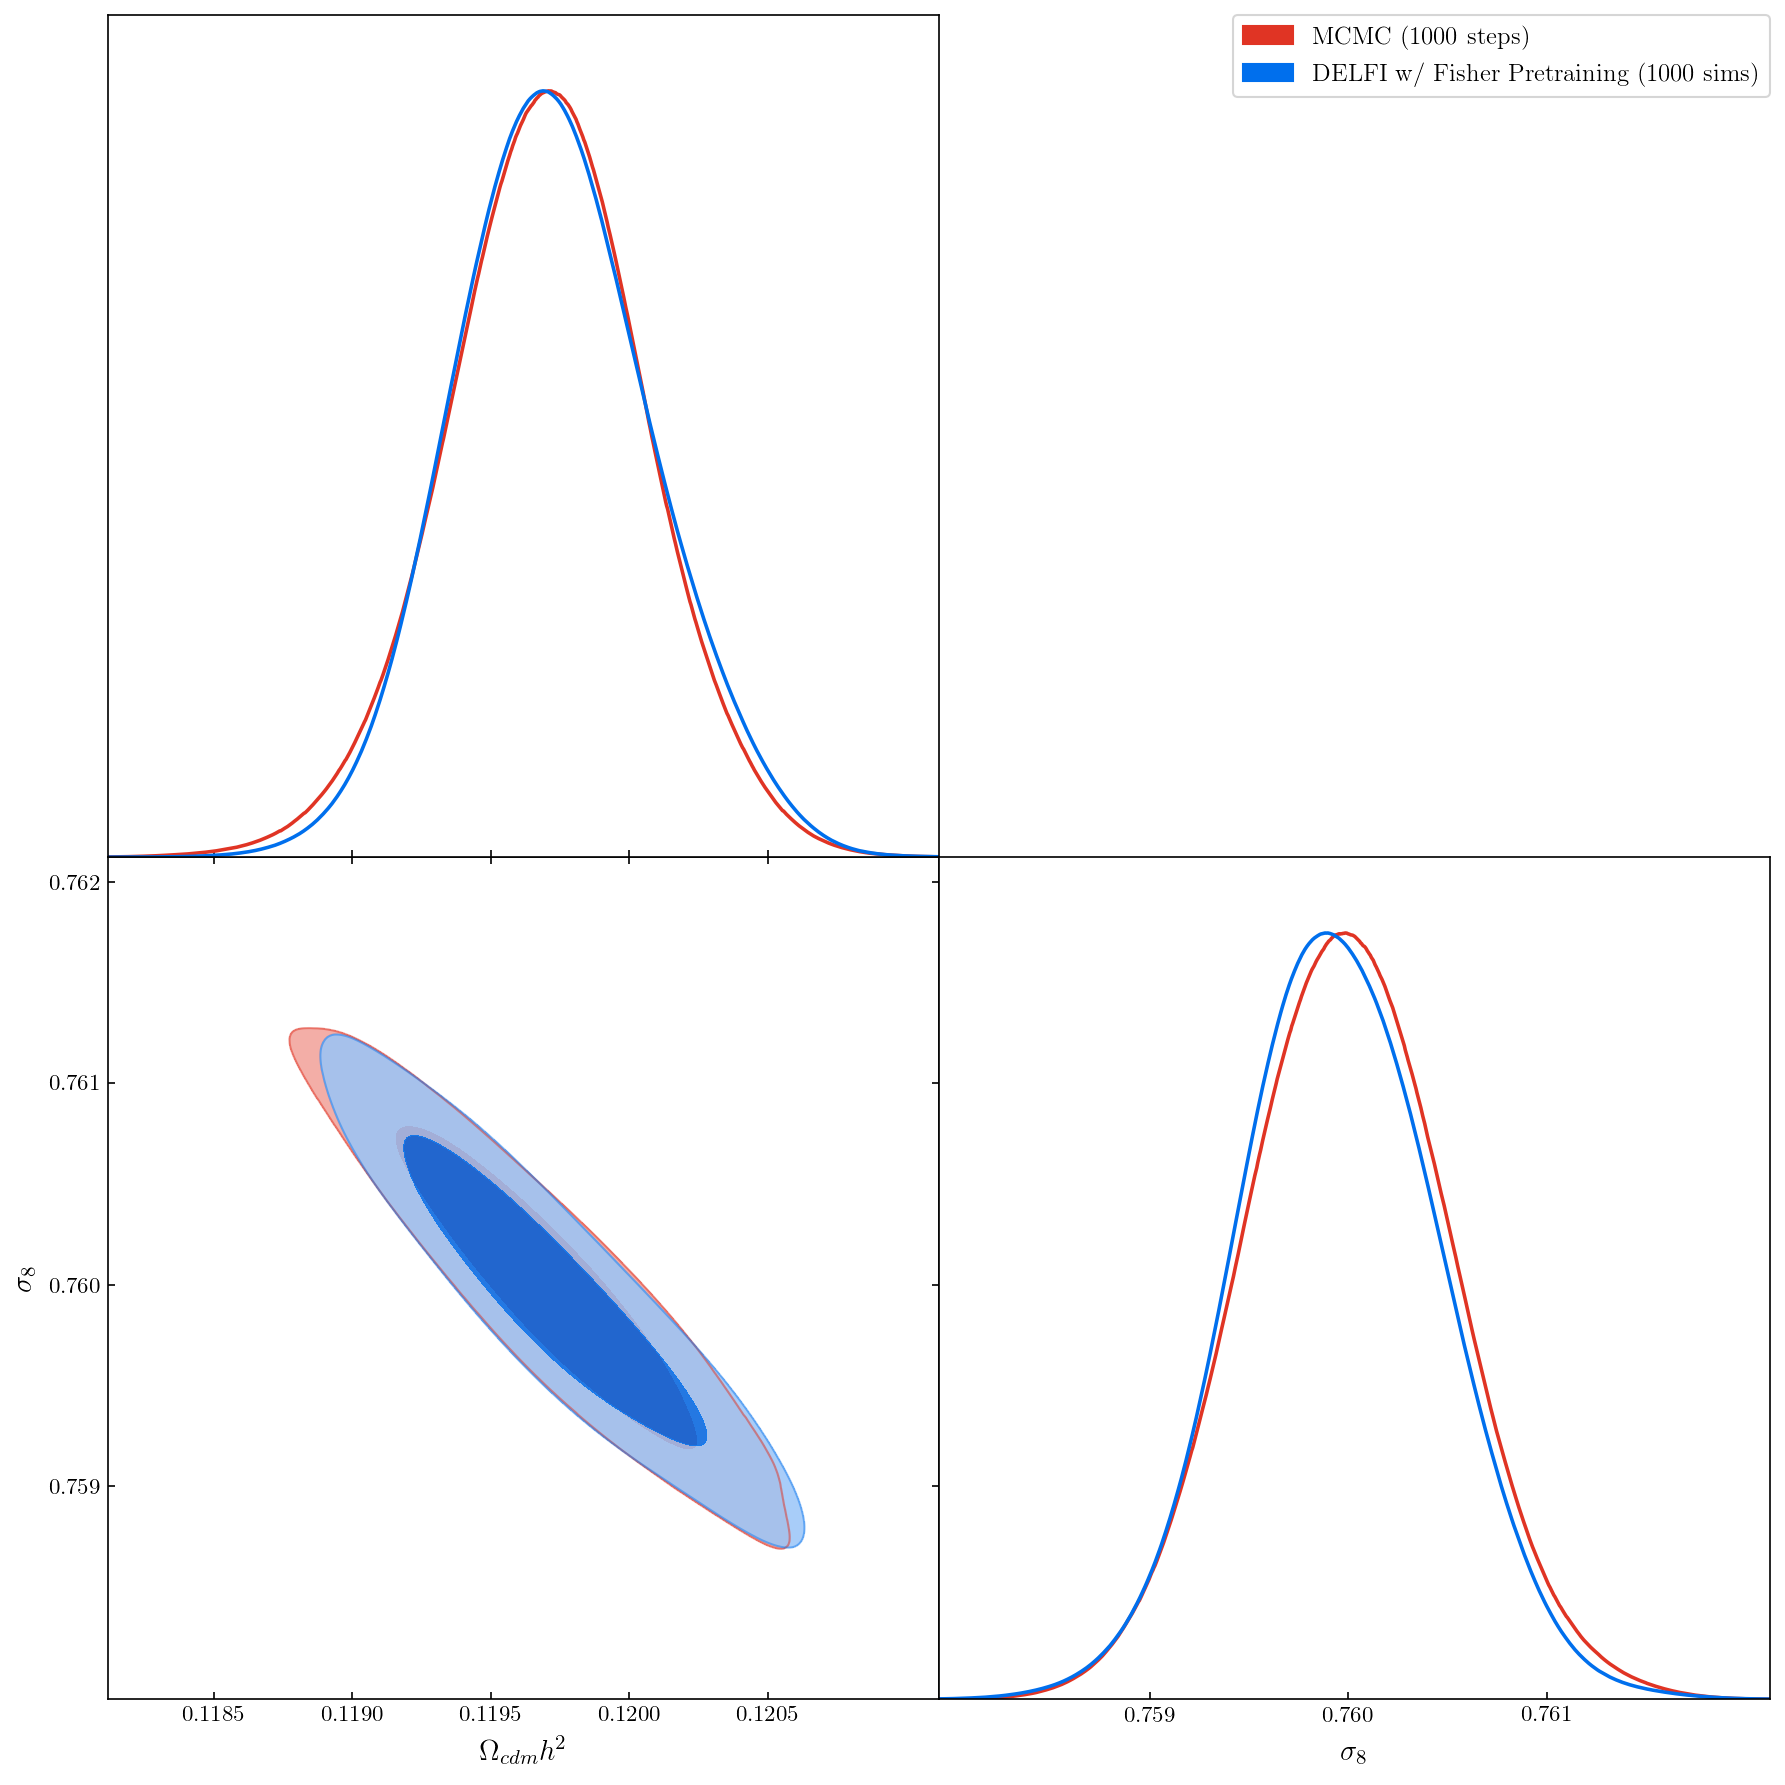

In [20]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples_f[0]], 
                legend_labels = ['MCMC (1000 steps)', 
                                 'DELFI w/ Fisher Pretraining (1000 sims)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

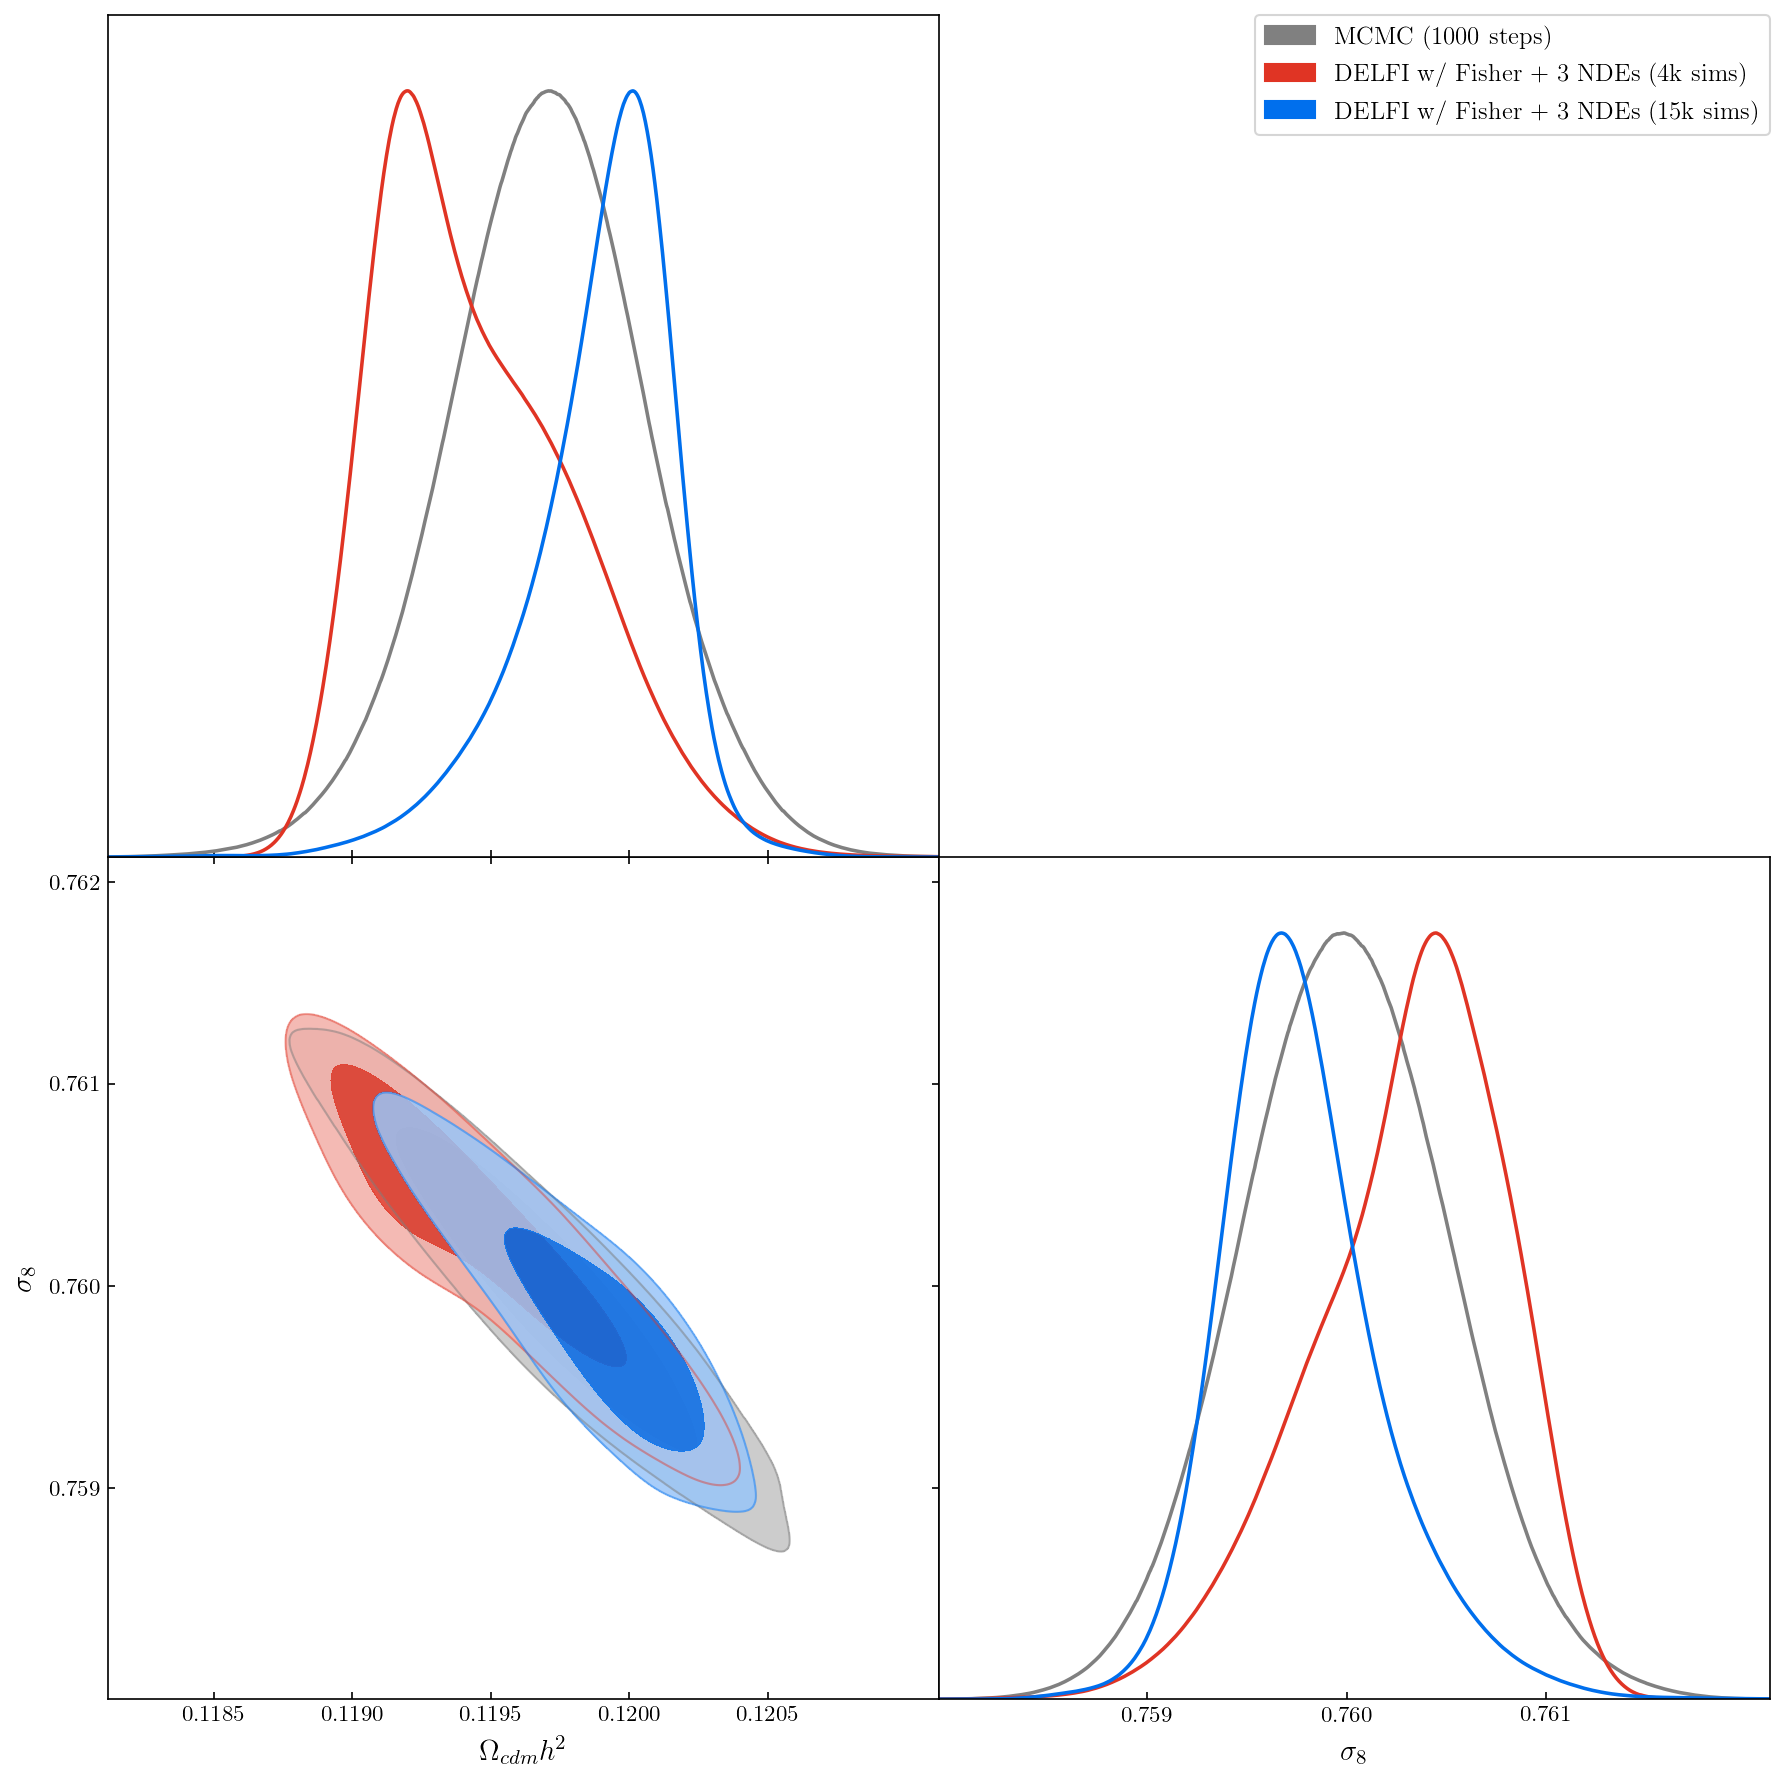

In [17]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples[0], delfi_samples_15k[0]], 
                legend_labels = ['MCMC (1000 steps)', 'DELFI w/ Fisher + 3 NDEs (4k sims)', 
                                 'DELFI w/ Fisher + 3 NDEs (15k sims)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)